In [1]:
import re 
import pandas as pd

In [2]:
f = open('_chat.txt','r', encoding='utf-8')

In [4]:
data = f.read()

In [5]:
data

'[03/06/24, 21:00:36] Ashirvad Help Group: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[03/06/24, 21:00:36] Aarav Sir: \u200eAarav Sir created group “Ashirvad Help Group”\n[03/06/24, 21:00:36] Ashirvad Help Group: \u200eAarav Sir added you\n[03/06/24, 21:01:01] Aarav Sir: https://www.geeksforgeeks.org/travel-journal-app-with-mern-stack-with-api/\n[03/06/24, 21:01:08] Aarav Sir: Ye banana h ?\n[03/06/24, 21:02:33] Ashirvad ITB 5: Sahi mai naam yhi hoga?\n[03/06/24, 21:02:45] Ashirvad ITB 5: Group ka?\n[03/06/24, 21:03:10] Aarav Sir: Group hamara issi reason se bana tha💀\n[03/06/24, 21:03:14] Aarav Sir: Change krna h krlo\n[03/06/24, 21:03:24] Ashirvad Help Group: \u200eYou\'re now an admin\n[03/06/24, 21:03:31] Ashirvad ITB 5: Kab bana tha?\n\u200e[03/06/24, 21:03:43] Harshavardhan Raju: \u200esticker omitted\n[03/06/24, 21:03:48] Harshavardhan Raju: Har bar\n[03/06/24, 21:03:56] Aarav Sir: Raat ke 2 bje

In [6]:
import re
import pandas as pd


def starts_with_u200e(text):
    pattern = r'^\u200e'
    return bool(re.match(pattern, text))


def remove_leading_u200e(text):
    return re.sub(r'^\u200e', '', text)


def remove_trailing_u200e(text):
    if text.endswith('\u200e'):
        return text[:-1]
    return text


def preprocess(data):
    pattern = r'\[\d{2}\/\d{2}\/\d{2}, \d{2}:\d{2}:\d{2}\]\s'
    messages = re.split(pattern, data)[1:]
    dates = re.findall(pattern, data)
    df = pd.DataFrame({
        'user_messages': messages,
        'message_date': dates
    })
    df['message_date'] = pd.to_datetime(df['message_date'], format='[%d/%m/%y, %H:%M:%S] ')
    users = []
    messages = []
    for message in df['user_messages']:
        entry = re.split(r'([\w\W]+?):\s', message)
        entry[2] = remove_trailing_u200e(entry[2])
        entry[2] = remove_leading_u200e(entry[2])
        users.append(entry[1])
        messages.append(entry[2])
    df['messages'] = messages
    df['users'] = users
    df.drop(columns=['user_messages'], inplace=True)
    df['year'] = df['message_date'].dt.year
    df['month'] = df['message_date'].dt.month_name()
    df['day'] = df['message_date'].dt.day
    df['hour'] = df['message_date'].dt.hour
    df['minute'] = df['message_date'].dt.minute

    return df



In [7]:
df = preprocess(data)

In [37]:
df_new=df[df["users"]=="Aarav Sir"]
df_new

,message_date,messages,users,year,month,day,hour,minute
1,2024-06-03 21:00:36,Aarav Sir created group “Ashirvad Help Group”\n,Aarav Sir,2024,June,3,21,0
3,2024-06-03 21:01:01,https://www.geeksforgeeks.org/travel-journal-a...,Aarav Sir,2024,June,3,21,1
4,2024-06-03 21:01:08,Ye banana h ?\n,Aarav Sir,2024,June,3,21,1
7,2024-06-03 21:03:10,Group hamara issi reason se bana tha💀\n,Aarav Sir,2024,June,3,21,3
8,2024-06-03 21:03:14,Change krna h krlo\n,Aarav Sir,2024,June,3,21,3
...,...,...,...,...,...,...,...,...
420,2024-07-03 18:38:02,Mai kissi ko krunga message ki krde madad\n,Aarav Sir,2024,July,3,18,38
422,2024-07-03 18:38:21,sticker omitted\n,Aarav Sir,2024,July,3,18,38
424,2024-07-03 18:44:51,Camera on rakhna h🥲\n,Aarav Sir,2024,July,3,18,44
429,2024-07-03 19:01:27,Camera on rahega\n,Aarav Sir,2024,July,3,19,1


In [27]:
def countNumOfWords(df):
    words = []
    for message in df['messages']:
        words.extend(message.split())
    return len(words)


def countMedia(selected_user, df):
    if selected_user != "Overall":
        df = df[df['users'] == selected_user]
    imageCount = df[df['messages']=='image omitted\n'].shape[0]
    videoCount = df[df['messages']=='video omitted\n'].shape[0]
    stickerCount = df[df['messages']=='sticker omitted\n'].shape[0]
    return imageCount, videoCount, stickerCount


def fetch_stats(selected_user, df):
    if selected_user != "Overall":
        df = df[df['users'] == selected_user]
    numOfMessages = df.shape[0]
    numOfWords = countNumOfWords(df)
    return numOfMessages, numOfWords


In [28]:
countMedia('Overall', df)

(57, 1, 14)

In [24]:
df[df['messages']=='image omitted\n'].shape[0]

57

In [41]:
x = df['users'].value_counts().head()

In [46]:
import matplotlib.pyplot as plt
name = x.index
counts = x.values

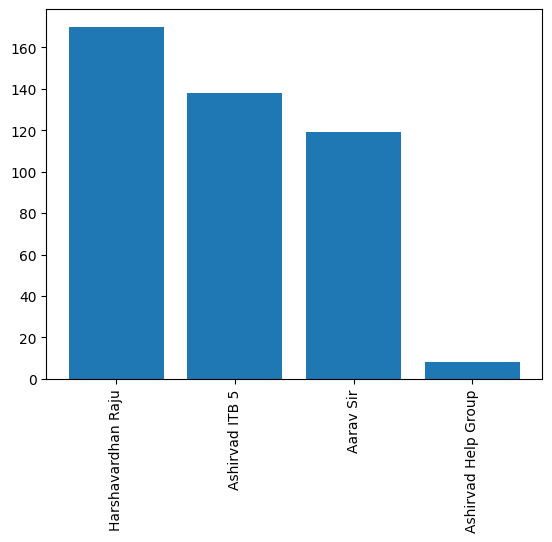

In [49]:
plt.bar(name, counts)
plt.xticks(rotation="vertical")
plt.show()

In [52]:
round((df['users'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'users':'name', 'count':'percent'})

,name,percent
0,Harshavardhan Raju,39.08
1,Ashirvad ITB 5,31.72
2,Aarav Sir,27.36
3,Ashirvad Help Group,1.84


In [62]:
words = []
for message in df['messages']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [60]:
f= open("stop_hinglish.txt", 'r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [63]:
from collections import Counter
Counter(words).most_common(20)

[('omitted', 74),
 ('image', 58),
 ('=', 20),
 ('#', 16),
 ('sticker', 14),
 ('group', 10),
 ('import', 10),
 ('@917993510822', 8),
 ('@919555496586', 7),
 ('phir', 7),
 ('page', 6),
 ('ashirvad', 5),
 ('changed', 5),
 ('meine', 5),
 ('message', 5),
 ('baat', 5),
 ('resume', 5),
 ('data', 5),
 ('banana', 4),
 ('naam', 4)]

In [71]:
emojis=[]
for message in df['messages']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
Counter(emojis).most_common(20)
        

[('😭', 5),
 ('💀', 4),
 ('🙂', 4),
 ('🫠', 3),
 ('😂', 3),
 ('🏻', 2),
 ('🌸', 2),
 ('🤡', 2),
 ('🥺', 2),
 ('🥲', 2),
 ('🤷', 1),
 ('♂', 1),
 ('👍', 1),
 ('🙏', 1),
 ('😓', 1)]

In [66]:
import emoji